12001 [0.00051159] [[0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]
 [0.97738516 0.95532181]]


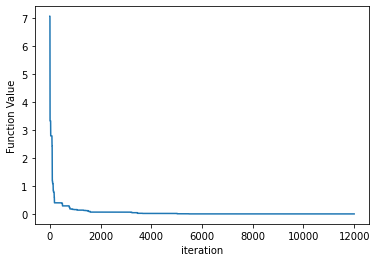

In [2]:
# 하모니서치 재호 코딩
import numpy as np
import random as rd

# 주어진 것들 나열
def f(x):
  return 100*(x[0]**2-x[1])**2+(1-x[0])**2

Dim=2
Low=-2.048
High=2.048

HMS=30
HMCR=0.9
PAR=0.3
bw=0.2
Maxitr=30000

# HM,HF 빈 행렬 생성
HM=np.zeros((HMS,Dim))
HF=np.zeros((HMS,1))

# HM,HF 무작위 초기값 설정
for i in range(0,HMS):
  HM[i,:]=[rd.uniform(Low,High),rd.uniform(Low,High)]
  HF[i,0]=f(HM[i,:])

stop=[]
iteration=[]
plot_Best=[]

Best_fv=min(HF)
BestLoc=[i for i, j in enumerate(HF) if j==Best_fv]
Worst_fv=max(HF)
WorstLoc=[i for i, j in enumerate(HF) if j==Worst_fv]

# HS 시작
for iter in range(0,Maxitr):

# Best하모니,Worst하모니 설정
  Best_fv=min(HF)
  BestLoc=[i for i, j in enumerate(HF) if j==Best_fv]
  Worst_fv=max(HF)
  WorstLoc=[i for i, j in enumerate(HF) if j==Worst_fv]
  
# 새로운 하모니를 위한 parameter 빈 행렬 설정
  selection=np.zeros((1,2))
  NFV=np.zeros((1,1))
  for i in range(0,2):
    selection[:,i]=np.random.rand()
    parameter=np.zeros((1,2))

# HMCR,PAR을 고려한 parameter 설정
  if selection[:,0]>=HMCR:
    parameter[:,0]=rd.uniform(Low,High)
    if selection[:,1]>=HMCR:
      parameter[:,1]=rd.uniform(Low,High)
    else:
      x=rd.randrange(0,HMS)
      parameter[:,1]=HM[x,1]
      if rd.random()<=PAR:
        parameter[:,:]=parameter[:,:]+(np.random.rand()-0.5)*bw
  else:
    x=rd.randrange(0,HMS)
    parameter[:,0]=HM[x,0]
    if rd.random()<=PAR:
      parameter[:,:]=parameter[:,:]+(np.random.rand()-0.5)*bw
      if selection[:,1]>=HMCR:
        parameter[:,1]=rd.uniform(Low,High)
      else:
        x=rd.randrange(0,HMS)
        parameter[:,1]=HM[x,1]
        if rd.random()<=PAR:
          parameter[:,:]=parameter[:,:]+(np.random.rand()-0.5)*bw

# HM,HF 업데이트
  if Worst_fv>f(parameter[0,:]):
    HM[WorstLoc,:]=parameter[0,:]
    HF[WorstLoc]=f(parameter[0,:])

  iteration.append(iter)
  plot_Best.extend(Best_fv)

# Stopping criteria 설정
  if iter%(Maxitr/5)==0:
    stop.append(Best_fv)
  if iter>Maxitr*2/5:
    if stop[-1]-stop[-2]==0:
      break

# 결과값 도출
print(iter,Best_fv,HM[BestLoc,:])

# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(iteration,plot_Best)
plt.xlabel('iteration')
plt.ylabel('Function Value')
plt.show()

함수를 입력하세요: 100*(x[0]**2-x[1])**2+(1-x[0])**2
x의 범위를 설정하세요: -2.048 2.048
HMS,Maxitr의 값을 설정하세요: 30 30000
HMCR,PAR,bw의 값을 설정하세요: 0.9 0.3 0.2
12001 [0.00010181] [[1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]
 [1.01008996 1.02028706]]


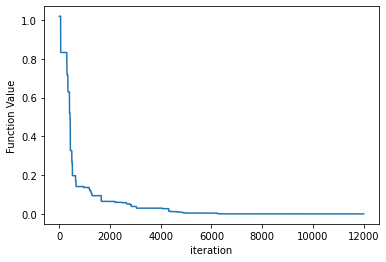

In [1]:
# 함수의 독립변수의 개수를 모를 때에도 돌아가는 알고리즘
import numpy as np
import random as rd
import re

# 함수 및 지정값 받기
a=0
y=input('함수를 입력하세요: ')
x_extract1=re.findall('x\W\d\W',y)
for i in x_extract1:
    x_extract2=re.findall('\d',str(x_extract1))
for i in x_extract2:
    if int(i)>a:
        a=int(i)+1

Dim=a
Low,High=input('x의 범위를 설정하세요: ').split()
HMS,Maxitr=input('HMS,Maxitr의 값을 설정하세요: ').split()
HMCR,PAR,bw=input('HMCR,PAR,bw의 값을 설정하세요: ').split()

# 문자열 숫자열로 바꾸기
Low=float(Low)
High=float(High)
HMS=int(HMS)
Maxitr=int(Maxitr)
HMCR=float(HMCR)
PAR=float(PAR)
bw=float(bw)

# HM,HF 빈 행렬 생성
HM=np.zeros((HMS,Dim))
HF=np.zeros((HMS,1))
x_values=np.zeros((1,Dim))
def f(x):
    x_values=x
    y1=y
    for i in range(0,Dim):
        for j in x_extract1:
            if j=='x[{}]'.format(i):
                y1=y1.replace(j, '{}'.format(x_values[i]))
    y1=eval(y1)
    return y1

# HM,HF 무작위 초기값 설정
for i in range(0,HMS):
    HM[i,:]=Low+(High-Low)*np.random.rand(1,Dim)
    HF[i,0]=f(HM[i,:])

stop=[]
iteration=[]
plot_Best=[]

# 초기 Best하모니,Worst하모니 설정
Best_fv=min(HF)
BestLoc=[i for i, j in enumerate(HF) if j==Best_fv]
Worst_fv=max(HF)
WorstLoc=[i for i, j in enumerate(HF) if j==Worst_fv]

# HS 시작
for iter in range(0,Maxitr):

# Best하모니,Worst하모니 갱신
    Best_fv=min(HF)
    BestLoc=[i for i, j in enumerate(HF) if j==Best_fv]
    Worst_fv=max(HF)
    WorstLoc=[i for i, j in enumerate(HF) if j==Worst_fv]
  
# 새로운 하모니를 위한 parameter 빈 행렬 설정
    slc_HMCR=np.zeros((1,Dim))
    slc_PAR=np.zeros((1,Dim))
    parameter=np.zeros((1,Dim))
    NFV=np.zeros((1,1))

# HS 시작
    for i in range(0,Dim):
        slc_HMCR[:,i]=np.random.rand()
        slc_PAR[:,i]=np.random.rand()
        if slc_HMCR[:,i]>=HMCR:
            parameter[:,i]=rd.uniform(Low,High)
        else :
            x=rd.randrange(0,HMS)
            parameter[:,i]=HM[x,i]
            if slc_PAR[:,i]<=PAR:
                parameter[:,i]=parameter[:,i]+(np.random.rand()-0.5)*bw
    
    if Worst_fv>f(parameter[0,:]):
        HM[WorstLoc,:]=parameter[0,:]
        HF[WorstLoc]=f(parameter[0,:])

    iteration.append(iter)
    plot_Best.extend(Best_fv)

# Stopping criteria 설정
    if iter%(Maxitr/5)==0:
        stop.append(Best_fv)
    if iter>Maxitr*2/5:
        if stop[-1]-stop[-2]==0:
            break

# 결과값 도출
print(iter,Best_fv,HM[BestLoc,:])

# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(iteration,plot_Best)
plt.xlabel('iteration')
plt.ylabel('Function Value')
plt.show()